In [98]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import random
import time

In [73]:
def make_graph_nx(node_list, target_nodes, edge_list):
    G = nx.Graph()
    labels = {}
    for node in node_list:
        labels[node] = node
        G.add_node(node)

    G.add_node(target_nodes[0])
    labels[target_nodes[0]] = target_nodes[0]
    G.add_node(target_nodes[1])
    labels[target_nodes[1]] = target_nodes[1]

    for edge in edge_list:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.kamada_kawai_layout(G)

    return G, pos, labels


def draw_graph(graph, pos, nodes, targets, labels):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


def draw_shortest_path_graph(graph, pos, nodes, targets, labels, path_nodes):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='y', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


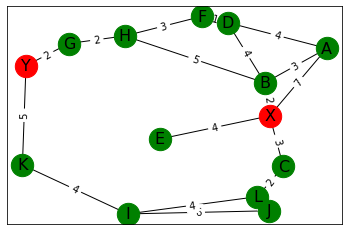

In [74]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
targets = ['X', 'Y']
edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

G, pos, labels = make_graph_nx(nodes, targets, edges)
draw_graph(G, pos, nodes, targets, labels)

In [75]:
pred_dijkstra, dist_dijkstra = nx.dijkstra_predecessor_and_distance(G, 'X')

data_dijkstra = []
for key, val in sorted(dist_dijkstra.items()):
    data_dijkstra.append(['X', key, val, pred_dijkstra[key]])

df_dijkstra = pd.DataFrame(data_dijkstra, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_dijkstra

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [76]:
shortest_path_dijkstra = nx.dijkstra_path(G, 'X', 'Y', weight='weight')
path_nodes_dijkstra = shortest_path_dijkstra[1:len(shortest_path_dijkstra)-1]
print(shortest_path_dijkstra)

['X', 'B', 'H', 'G', 'Y']


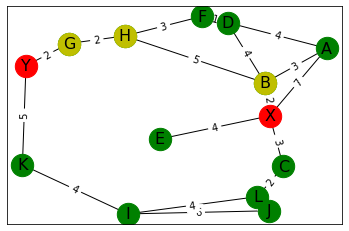

In [77]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_dijkstra)

In [78]:
pred_bf, dist_bf = nx.bellman_ford_predecessor_and_distance(G, 'X')

data_bf = []
for key, val in sorted(dist_bf.items()):
    data_bf.append(['X', key, val, pred_bf[key]])

df_bf = pd.DataFrame(data_bf, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_bf

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [79]:
shortest_path_bf = nx.bellman_ford_path(G, 'X', 'Y', weight='weight')
path_nodes_bf = shortest_path_bf[1:len(shortest_path_bf)-1]
print(shortest_path_bf)
print(path_nodes_bf)

['X', 'B', 'H', 'G', 'Y']
['B', 'H', 'G']


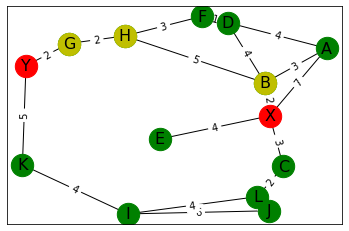

In [80]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_bf)

In [81]:
small_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    small_graphs.append(g)

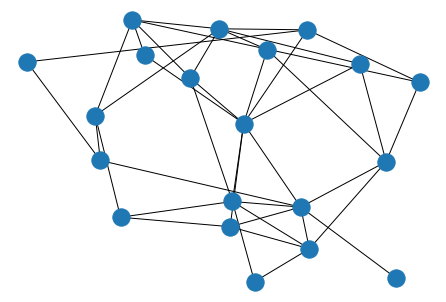

In [82]:
nx.draw(small_graphs[0])

In [99]:
def calc_dijkstra(g):
    start = time.time()
    pred, dist = nx.dijkstra_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_bellman_ford(g):
    start = time.time()
    pred, dist = nx.bellman_ford_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_floyd_warshall(g):
    start = time.time()
    pred, dist = nx.floyd_warshall_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

small_data = []
for graph in small_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    small_data.append([time_d, time_bf, time_fw])
    
small_time_df = pd.DataFrame(small_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])

In [84]:
neg_weights_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(-10,10)
    neg_weights_graphs.append(g)

neg_weights_data = []
for graph in neg_weights_graphs:
    time_fw = calc_floyd_warshall(graph)
    neg_weights_data.append(time_fw)

small_time_df['Floyd-Warshall (Negative)'] = neg_weights_data
small_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall,Floyd-Warshall (Negative)
0,0.000212,0.000298,0.004777,0.001520
1,0.000169,0.000585,0.006736,0.001450
2,0.000164,0.000391,0.002351,0.001789
3,0.000157,0.000294,0.002123,0.001505
4,0.000469,0.000547,0.002682,0.001628
...,...,...,...,...
995,0.000064,0.000163,0.001214,0.001232
996,0.000071,0.000168,0.001083,0.001169
997,0.000060,0.000144,0.001261,0.001119
998,0.000063,0.000137,0.001070,0.001364


In [85]:
large_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(100,200)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    large_graphs.append(g)

large_data = []
for graph in large_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    large_data.append([time_d, time_bf, time_fw])

large_time_df = pd.DataFrame(large_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])
large_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall
0,0.000673,0.001465,0.184865
1,0.000425,0.001048,0.168605
2,0.000414,0.001300,0.171798
3,0.000419,0.001208,0.175040
4,0.000583,0.001692,0.176469
...,...,...,...
995,0.000429,0.001104,0.161408
996,0.000433,0.001381,0.181417
997,0.000430,0.001361,0.186147
998,0.000435,0.003420,0.185669


In [86]:
large_neg_weights_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(100,200)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(-10,10)
    large_neg_weights_graphs.append(g)

large_neg_weights_data = []
for graph in large_neg_weights_graphs:
    time_fw = calc_floyd_warshall(graph)
    large_neg_weights_data.append(time_fw)

large_time_df['Floyd-Warshall (Negative)'] = large_neg_weights_data
large_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall,Floyd-Warshall (Negative)
0,0.000673,0.001465,0.184865,0.154869
1,0.000425,0.001048,0.168605,0.174799
2,0.000414,0.001300,0.171798,0.139363
3,0.000419,0.001208,0.175040,0.126113
4,0.000583,0.001692,0.176469,0.133378
...,...,...,...,...
995,0.000429,0.001104,0.161408,0.175147
996,0.000433,0.001381,0.181417,0.168924
997,0.000430,0.001361,0.186147,0.172516
998,0.000435,0.003420,0.185669,0.169807


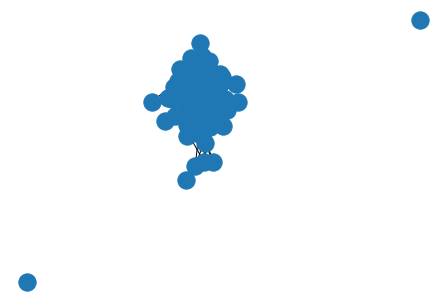

In [40]:
nx.draw(large_graphs[0])

In [87]:
small_graphs_avg_time = [
    small_time_df['Dijkstra'].sum()/len(small_time_df['Dijkstra']),
    small_time_df['Bellman-Ford'].sum()/len(small_time_df['Bellman-Ford']),
    small_time_df['Floyd-Warshall'].sum()/len(small_time_df['Floyd-Warshall']),
    small_time_df['Floyd-Warshall (Negative)'].sum()/len(small_time_df['Floyd-Warshall (Negative)'])
]

large_graphs_avg_time = [
    large_time_df['Dijkstra'].sum()/len(large_time_df['Dijkstra']),
    large_time_df['Bellman-Ford'].sum()/len(large_time_df['Bellman-Ford']),
    large_time_df['Floyd-Warshall'].sum()/len(large_time_df['Floyd-Warshall']),
    large_time_df['Floyd-Warshall (Negative)'].sum()/len(large_time_df['Floyd-Warshall (Negative)'])
]

print(small_graphs_avg_time)
print(large_graphs_avg_time)

[8.647465705871583e-05, 0.00021370410919189454, 0.0014453887939453124, 0.0022554168701171876]
[0.00044673609733581545, 0.0012252159118652343, 0.16330724763870239, 0.14737744855880738]


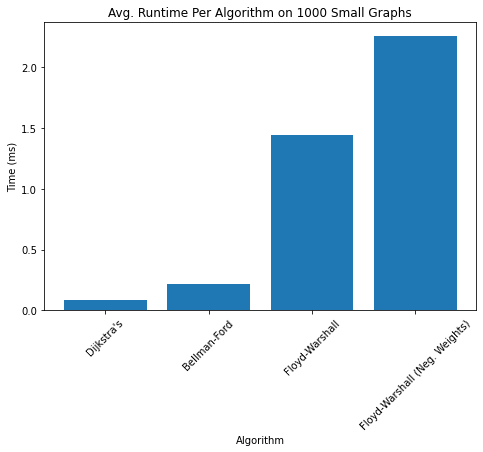

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithm = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall', 'Floyd-Warshall (Neg. Weights)']
time = np.asarray(small_graphs_avg_time) * 1000
ax.bar(algorithm, time)
plt.title('Avg. Runtime Per Algorithm on 1000 Small Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

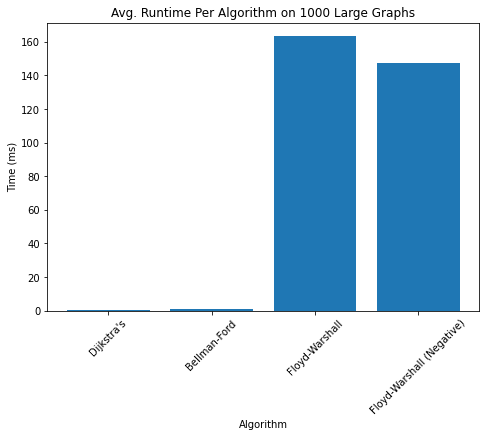

In [90]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
algorithm2 = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall', 'Floyd-Warshall (Negative)']
time2 = np.asarray(large_graphs_avg_time) * 1000
ax2.bar(algorithm2, time2)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

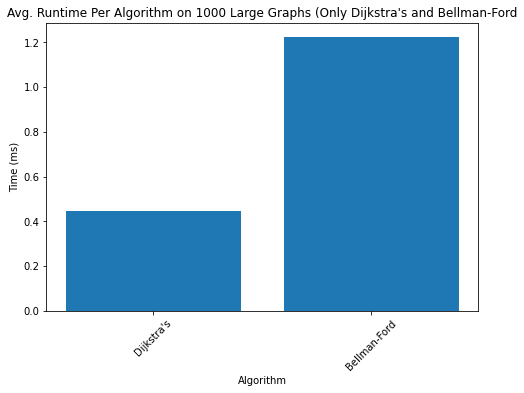

In [92]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
algorithm3 = ['Dijkstra\'s', 'Bellman-Ford']
time3 = np.asarray(large_graphs_avg_time[:len(large_graphs_avg_time)-2]) * 1000
ax3.bar(algorithm3, time3)
plt.title('Avg. Runtime Per Algorithm on 1000 Large Graphs (Only Dijkstra\'s and Bellman-Ford')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

In [93]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

data = [
    go.Bar(x=algorithm3, y=np.asarray(large_graphs_avg_time[:len(large_graphs_avg_time)-2]) * 1000, name='Runtime Large Graphs',  
            #base=0
           ),
    go.Bar(x=algorithm3, y=np.asarray(small_graphs_avg_time[:len(small_graphs_avg_time)-2]) * 1000, name='Runtime Small Graphs', 
           #base=0,
           #width=0.5
          )]

layout = go.Layout(
    barmode='overlay',
)

fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)

In [94]:
print(small_graphs_avg_time[0]/small_graphs_avg_time[1])
print(large_graphs_avg_time[0]/large_graphs_avg_time[1])

0.4046466742530736
0.36461826279722154


In [100]:
equal_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(40,40)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    equal_graphs.append(g)

equal_data = []
for graph in equal_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    equal_data.append([time_d, time_bf, time_fw])
    
equal_time_df = pd.DataFrame(small_data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])
equal_time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall
0,0.000106,0.000485,0.002715
1,0.000590,0.000350,0.001913
2,0.000103,0.000244,0.002033
3,0.000103,0.000252,0.001650
4,0.000091,0.000248,0.001563
...,...,...,...
995,0.000061,0.000160,0.001415
996,0.000077,0.000179,0.002565
997,0.000120,0.000297,0.002084
998,0.000149,0.000253,0.002116


In [101]:
equal_graphs_avg_time = [
    equal_time_df['Dijkstra'].sum()/len(equal_time_df['Dijkstra']),
    equal_time_df['Bellman-Ford'].sum()/len(equal_time_df['Bellman-Ford']),
    equal_time_df['Floyd-Warshall'].sum()/len(equal_time_df['Floyd-Warshall'])
]

print(equal_graphs_avg_time)

[0.00014984440803527833, 0.00033305978775024413, 0.002320887804031372]


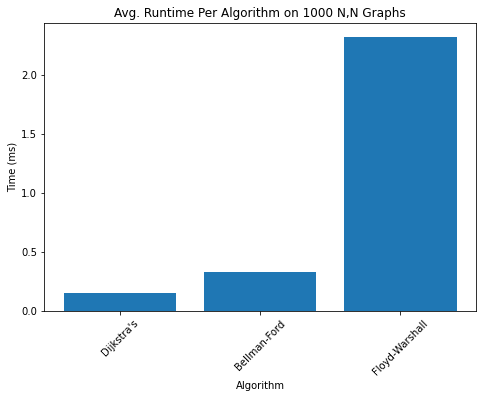

In [102]:
fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
algorithm5 = ['Dijkstra\'s', 'Bellman-Ford', 'Floyd-Warshall']
time5 = np.asarray(equal_graphs_avg_time) * 1000
ax5.bar(algorithm5, time5)
plt.title('Avg. Runtime Per Algorithm on 1000 N,N Graphs')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()